## Implement Ensemble Agent

Ensemble agent that controlls all the sub price agents of different models

In [1]:
# imports

import os
import re
import math
import json
from tqdm import tqdm
import logging
import random
from dotenv import load_dotenv
from huggingface_hub import login
import matplotlib.pyplot as plt
import numpy as np
import pickle
from openai import OpenAI
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
import modal

### Internal Classes
from testing import Tester
from agents.ensemble_agent import EnsembleAgent

/Volumes/VTG/Dev/C_5/Projects/week8/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# environment

load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

In [3]:
# Log in to HuggingFace

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
with open("test.pkl", "rb") as f: 
    test = pickle.load(f)

In [5]:
DB = "products_vectorstore/"

client = chromadb.PersistentClient(path=DB)
collection = client.get_or_create_collection("product")

In [6]:
def description(item):
    text = item.prompt.replace("How much does this cost to the nearest dollar?\n\n", "")
    return text.split("\n\nPrice is $")[0]

In [7]:
logging.basicConfig(level=logging.INFO)

In [8]:
ensemble_agent = EnsembleAgent(collection)

INFO:root:[Ensemble Agent] Initializing Ensemble Agent...
INFO:root:[Specialist Agent] Specialist Agent is initializing -- connecting to Modal...
INFO:root:[Specialist Agent] Specialist Agent is ready!
INFO:root:[Frontier Agent] Initializing Frontier Agent...
INFO:root:[Frontier Agent] Frontier Agent is setting up with OpenAI
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: mps
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
INFO:root:[Frontier Agent] Frontier Agent is ready!
INFO:root:[Neural Network Agent] Neural Network Agent is initializing...
INFO:root:[Neural Network Agent] Neural Network Agent is ready!
INFO:root:[Ensemble Agent] Ensemble Agent is ready!


INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and neural network agents...
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model... If this is a cold start, this might take some time to wake it up
INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Neural Network Agent] Neural Network Agent i

1: Guess: $170.09 Truth: $249.99 Error: $79.90 SLE: 0.15 Item: Medicom Batman Hush Black Suit Version B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $42.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.09
INFO:root:[Ensemble Agent] Frontier Err: 86.00
INFO:root:[Ensemble Agent] Special E

2: Guess: $9.09 Truth: $3.99 Error: $5.10 SLE: 0.50 Item: ALTKOL S Hooks for Hanging, 15-Pack S Sh...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.83it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $39.67
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $120.53
INFO:root:[Ensemble Agent] Frontier Err: 105.01
INFO:root:[Ensemble Agent] Spe

3: Guess: $120.53 Truth: $109.99 Error: $10.54 SLE: 0.01 Item: Nady RSM-5 Ribbon Microphone - Unique co...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.03it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $8.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $60.25
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $8.39
INFO:root:[Ensemble Agent] Frontier Err: 107.03
INFO:root:[Ensemble Agent] Special 

4: Guess: $8.39 Truth: $6.97 Error: $1.42 SLE: 0.03 Item: PANDAFLY Acrylic Paint Pens for Rock Pai...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.01it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $150.05
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $136.89
INFO:root:[Ensemble Agent] Frontier Err: 142.03
INFO:root:[Ensemble Agent] S

5: Guess: $136.89 Truth: $164.99 Error: $28.10 SLE: 0.03 Item: Mistel MD600RGB v3 60% Split Mechanical ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $163.42
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $45.29
INFO:root:[Ensemble Agent] Frontier Err: 316.04
INFO:root:[Ensemble Agent] Spec

6: Guess: $45.29 Truth: $204.00 Error: $158.71 SLE: 2.21 Item: SWITCH by Design Studio, Big Giant Plaid...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $173.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $157.35
INFO:root:[Ensemble Agent] Frontier Err: 335.04
INFO:root:[Ensemble Agent] S

7: Guess: $157.35 Truth: $168.00 Error: $10.65 SLE: 0.00 Item: Polk Audio - A Pair of DB652 6.5" Coaxia...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.44it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $52.68
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Frontier Err: 350.03
INFO:root:[Ensemble Agent] Speci

8: Guess: $37.19 Truth: $15.00 Error: $22.19 SLE: 0.76 Item: 6 Pack of 2 Inch Acoustic Foam Panels- P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $429.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $47.17
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $436.10
INFO:root:[Ensemble Agent] Frontier Err: 400.71
INFO:root:[Ensemble Agent] Sp

9: Guess: $436.10 Truth: $378.32 Error: $57.78 SLE: 0.02 Item: Guild Guitars Jumbo Jr Mahogany Acoustic...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.86it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $148.24
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $128.90
INFO:root:[Ensemble Agent] Frontier Err: 408.15
INFO:root:[Ensemble Agent] S

10: Guess: $128.90 Truth: $122.55 Error: $6.35 SLE: 0.00 Item: SIIG 10 Port 150W USB Charging Station w...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $361.03
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $270.20
INFO:root:[Ensemble Agent] Frontier Err: 437.16
INFO:root:[Ensemble Agent] S

11: Guess: $270.20 Truth: $219.99 Error: $50.21 SLE: 0.04 Item: HIK-Tech US 4K(8MP) Outdoor ColorVu Bull...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $262.38
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $155.42
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $243.21
INFO:root:[Ensemble Agent] Frontier Err: 466.08
INFO:root:[Ensemble Agent] S

12: Guess: $243.21 Truth: $291.30 Error: $48.09 SLE: 0.03 Item: IsoStation IS-5AC-US 5GHz 802.11ac CPE 1...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $30.44
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $58.19
INFO:root:[Ensemble Agent] Frontier Err: 500.07
INFO:root:[Ensemble Agent] Speci

13: Guess: $58.19 Truth: $26.00 Error: $32.19 SLE: 0.62 Item: Hot Wheels Volcano Escape Playset


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $122.27
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $33.69
INFO:root:[Ensemble Agent] Frontier Err: 508.06
INFO:root:[Ensemble Agent] Spec

14: Guess: $33.69 Truth: $17.00 Error: $16.69 SLE: 0.43 Item: Beadaholique Hot-Fix Applicator Wand Too...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $31.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $28.49
INFO:root:[Ensemble Agent] Frontier Err: 508.06
INFO:root:[Ensemble Agent] Speci

15: Guess: $28.49 Truth: $29.99 Error: $1.50 SLE: 0.00 Item: Beyblade Slingshock Turbo Spryzen S4


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $35.63
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $28.49
INFO:root:[Ensemble Agent] Frontier Err: 509.30
INFO:root:[Ensemble Agent] Speci

16: Guess: $28.49 Truth: $28.75 Error: $0.26 SLE: 0.00 Item: Breaking Games Mobscenity The Totally Bl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $109.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Frontier Err: 512.50
INFO:root:[Ensemble Agent] Spec

17: Guess: $37.19 Truth: $33.19 Error: $4.00 SLE: 0.01 Item: Resistance Tester Resistance Capacitance...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.25
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $40.69
INFO:root:[Ensemble Agent] Frontier Err: 532.50
INFO:root:[Ensemble Agent] Speci

18: Guess: $40.69 Truth: $54.99 Error: $14.30 SLE: 0.09 Item: Designer Skin Angel, 20-Ounce Bottle


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $135.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $659.00
INFO:root:[Ensemble Agent] Frontier Err: 682.50
INFO:root:[Ensemble Agent] S

19: Guess: $659.00 Truth: $849.00 Error: $190.00 SLE: 0.06 Item: Audio-Technica AT-LP7 Fully Manual Belt-...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $235.82
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $214.77
INFO:root:[Ensemble Agent] Frontier Err: 782.50
INFO:root:[Ensemble Agent] Sp

20: Guess: $214.77 Truth: $149.99 Error: $64.78 SLE: 0.13 Item: Hobbywing XERUN 1/8 Competition G3 Motor...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.52it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $16.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $53.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $16.90
INFO:root:[Ensemble Agent] Frontier Err: 782.50
INFO:root:[Ensemble Agent] Speci

21: Guess: $16.90 Truth: $16.00 Error: $0.90 SLE: 0.00 Item: Interactive Professional Acrylic 80 ml T...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.64it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $140.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $204.54
INFO:root:[Ensemble Agent] Frontier Err: 793.49
INFO:root:[Ensemble Agent] Sp

22: Guess: $204.54 Truth: $259.99 Error: $55.45 SLE: 0.06 Item: Everflow Sammys 8137957-100 SH-DSTR 1 3/...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $119.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $91.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $111.95
INFO:root:[Ensemble Agent] Frontier Err: 801.58
INFO:root:[Ensemble Agent] Spe

23: Guess: $111.95 Truth: $128.08 Error: $16.13 SLE: 0.02 Item: Cameron Sino Battery for Samsung PowerBo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.54it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $25.13
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $35.49
INFO:root:[Ensemble Agent] Frontier Err: 876.58
INFO:root:[Ensemble Agent] Speci

24: Guess: $35.49 Truth: $114.99 Error: $79.50 SLE: 1.34 Item: Jackie O, BLING Women Reading Glasses, C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.60it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $139.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $97.68
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $131.98
INFO:root:[Ensemble Agent] Frontier Err: 1,116.11
INFO:root:[Ensemble Agent] S

25: Guess: $131.98 Truth: $379.52 Error: $247.54 SLE: 1.11 Item: Wiegmann N1P2436PP N1P-Series Medium Per...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $120.47
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $41.79
INFO:root:[Ensemble Agent] Frontier Err: 1,161.07
INFO:root:[Ensemble Agent] Sp

26: Guess: $41.79 Truth: $69.95 Error: $28.16 SLE: 0.26 Item: Western Digital 250GB Caviar Re Sata I 7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $35.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $73.09
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.89
INFO:root:[Ensemble Agent] Frontier Err: 1,165.07
INFO:root:[Ensemble Agent] Spe

27: Guess: $30.89 Truth: $39.99 Error: $9.10 SLE: 0.06 Item: LIGHTAILING Led Light for Lego 71395 Que...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.69it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $304.01
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $689.00
INFO:root:[Ensemble Agent] Frontier Err: 1,165.07
INFO:root:[Ensemble Agent]

28: Guess: $689.00 Truth: $699.00 Error: $10.00 SLE: 0.00 Item: Supro 1822RTB Delta King 12 15W Tube Gui...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $699.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.08it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $599.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $699.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $609.00
INFO:root:[Ensemble Agent] Frontier Err: 1,565.07
INFO:root:[Ensemble Agent]

29: Guess: $609.00 Truth: $999.00 Error: $390.00 SLE: 0.24 Item: 2020 Newest HP Pavilion 17.3 Inch Laptop...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $38.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $52.29
INFO:root:[Ensemble Agent] Frontier Err: 1,575.05
INFO:root:[Ensemble Agent] Spe

30: Guess: $52.29 Truth: $49.97 Error: $2.32 SLE: 0.00 Item: Ecoflex 00-10 - Super-Soft, Addition Cur...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.64it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $6.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $26.22
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $6.99
INFO:root:[Ensemble Agent] Frontier Err: 1,584.05
INFO:root:[Ensemble Agent] Specia

31: Guess: $6.99 Truth: $15.99 Error: $9.00 SLE: 0.57 Item: CleverDelights 6mm Brown Leather Cord - ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $60.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.28
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $66.30
INFO:root:[Ensemble Agent] Frontier Err: 1,639.54
INFO:root:[Ensemble Agent] Spe

32: Guess: $66.30 Truth: $115.49 Error: $49.19 SLE: 0.30 Item: 3M 06520 White Marine 5200 Fast Cure Sea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $58.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.49
INFO:root:[Ensemble Agent] Frontier Err: 1,657.54
INFO:root:[Ensemble Agent] Spe

33: Guess: $21.49 Truth: $37.99 Error: $16.50 SLE: 0.30 Item: NERF Ner Rival 100 Round Refill


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $126.35
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $142.21
INFO:root:[Ensemble Agent] Frontier Err: 1,690.54
INFO:root:[Ensemble Agent] 

34: Guess: $142.21 Truth: $182.99 Error: $40.78 SLE: 0.06 Item: Voltive 16/2 Speaker Wire - 16 AWG/Gauge...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $336.60
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $131.47
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $332.84
INFO:root:[Ensemble Agent] Frontier Err: 1,710.32
INFO:root:[Ensemble Agent]

35: Guess: $332.84 Truth: $356.38 Error: $23.54 SLE: 0.00 Item: Sony MDRRF970RK Wireless Stereo Headphon...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $3.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $3.80
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $10.79
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $3.56
INFO:root:[Ensemble Agent] Frontier Err: 1,711.51
INFO:root:[Ensemble Agent] Specia

36: Guess: $3.56 Truth: $4.99 Error: $1.43 SLE: 0.07 Item: Dark Blue Marble Grain Patterned Glass B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $8.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $9.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $8.39
INFO:root:[Ensemble Agent] Frontier Err: 1,724.51
INFO:root:[Ensemble Agent] Special

37: Guess: $8.39 Truth: $21.99 Error: $13.60 SLE: 0.80 Item: Craftdady 10 Strands 9mm Flat Round Natu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $25.67
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $40.69
INFO:root:[Ensemble Agent] Frontier Err: 1,737.52
INFO:root:[Ensemble Agent] Spe

38: Guess: $40.69 Truth: $48.00 Error: $7.31 SLE: 0.03 Item: Bothy Threads Love Blossoms Cross Stitch...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $206.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $131.83
INFO:root:[Ensemble Agent] Frontier Err: 1,777.52
INFO:root:[Ensemble Agent]

39: Guess: $131.83 Truth: $169.99 Error: $38.16 SLE: 0.06 Item: Mackie Signal Direct Box (MDB-USB)


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $219.68
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $261.96
INFO:root:[Ensemble Agent] Frontier Err: 1,797.48
INFO:root:[Ensemble Agent]

40: Guess: $261.96 Truth: $299.95 Error: $37.99 SLE: 0.02 Item: American Bass Xfl1244 12 2000w Car Audio...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.40it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $975.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $276.05
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $907.40
INFO:root:[Ensemble Agent] Frontier Err: 1,980.59
INFO:root:[Ensemble Agent]

41: Guess: $907.40 Truth: $791.89 Error: $115.51 SLE: 0.02 Item: Acme Electric T279743S Low Voltage Distr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $159.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $142.61
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $151.52
INFO:root:[Ensemble Agent] Frontier Err: 1,994.90
INFO:root:[Ensemble Agent] 

42: Guess: $151.52 Truth: $174.30 Error: $22.78 SLE: 0.02 Item: Thomas Traceable Digital Thermometer, wi...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $109.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.99it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $109.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $99.52
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $108.53
INFO:root:[Ensemble Agent] Frontier Err: 1,994.90
INFO:root:[Ensemble Agent] 

43: Guess: $108.53 Truth: $109.00 Error: $0.47 SLE: 0.00 Item: Seymour Duncan SH8 Invader Humbucker Bri...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $21.59
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $73.99
INFO:root:[Ensemble Agent] Frontier Err: 2,060.97
INFO:root:[Ensemble Agent] Spe

44: Guess: $73.99 Truth: $146.06 Error: $72.07 SLE: 0.45 Item: Anker Magnetic Phone Grip (MagGo) with A...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $104.29
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $25.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $98.03
INFO:root:[Ensemble Agent] Frontier Err: 2,074.18
INFO:root:[Ensemble Agent] Sp

45: Guess: $98.03 Truth: $117.50 Error: $19.47 SLE: 0.03 Item: Knitter's Pride Ginger Interchangeable C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $199.13
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $184.95
INFO:root:[Ensemble Agent] Frontier Err: 2,084.18
INFO:root:[Ensemble Agent]

46: Guess: $184.95 Truth: $169.99 Error: $14.96 SLE: 0.01 Item: Android 11 Car Stereo for Jeep Compass P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.40it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $163.50
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $272.14
INFO:root:[Ensemble Agent] Frontier Err: 2,224.18
INFO:root:[Ensemble Agent]

47: Guess: $272.14 Truth: $419.99 Error: $147.85 SLE: 0.19 Item: Canon EOS 40D 10.1MP Digital SLR Camera ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $64.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $75.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $69.79
INFO:root:[Ensemble Agent] Frontier Err: 2,229.18
INFO:root:[Ensemble Agent] Spe

48: Guess: $69.79 Truth: $59.99 Error: $9.80 SLE: 0.02 Item: NOVICA Bamboo Andean Quena Flute with Ow...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $0.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $0.99
INFO:root:[Ensemble Agent] Frontier Err: 2,231.68
INFO:root:[Ensemble Agent] Specia

49: Guess: $0.99 Truth: $3.49 Error: $2.50 SLE: 0.66 Item: Magic the Gathering: Mountain (139) - Un...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.75it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $309.79
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $139.88
INFO:root:[Ensemble Agent] Frontier Err: 2,264.20
INFO:root:[Ensemble Agent]

50: Guess: $139.88 Truth: $97.47 Error: $42.41 SLE: 0.13 Item: Dell P2214H (Latest Model) IPS 22" Full ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.76it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $270.97
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $127.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $246.39
INFO:root:[Ensemble Agent] Frontier Err: 2,274.46
INFO:root:[Ensemble Agent]

51: Guess: $246.39 Truth: $260.71 Error: $14.32 SLE: 0.00 Item: Soultone Cymbals CBRRA-BBRID22-22" Custo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.46it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $143.03
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $153.54
INFO:root:[Ensemble Agent] Frontier Err: 2,373.47
INFO:root:[Ensemble Agent]

52: Guess: $153.54 Truth: $249.00 Error: $95.46 SLE: 0.23 Item: Gefen CI GTV-COMPSVID-2-HDMIS Composite ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.10it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1.89
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $16.40
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1.62
INFO:root:[Ensemble Agent] Frontier Err: 2,373.62
INFO:root:[Ensemble Agent] Specia

53: Guess: $1.62 Truth: $1.74 Error: $0.12 SLE: 0.00 Item: YU-GI-OH! - Mage Power (YSYR-EN029) - St...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.32it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $44.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $114.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $47.69
INFO:root:[Ensemble Agent] Frontier Err: 2,382.57
INFO:root:[Ensemble Agent] Sp

54: Guess: $47.69 Truth: $53.94 Error: $6.25 SLE: 0.01 Item: JMBricklayer Space Astronaut Building Se...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.09it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $289.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $161.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $289.09
INFO:root:[Ensemble Agent] Frontier Err: 2,414.75
INFO:root:[Ensemble Agent]

55: Guess: $289.09 Truth: $257.77 Error: $31.32 SLE: 0.01 Item: Standard Horizon HX400IS Intrinsically S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $296.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.21it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $389.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $238.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $379.70
INFO:root:[Ensemble Agent] Frontier Err: 2,447.32
INFO:root:[Ensemble Agent]

56: Guess: $379.70 Truth: $421.57 Error: $41.87 SLE: 0.01 Item: Pump,3/4 HP,1 Ph,120/240VAC


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $189.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $141.98
INFO:root:[Ensemble Agent] Frontier Err: 2,475.32
INFO:root:[Ensemble Agent]

57: Guess: $141.98 Truth: $101.99 Error: $39.99 SLE: 0.11 Item: FreedConn Motorcycle Helmet Headset with...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $92.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $204.49
INFO:root:[Ensemble Agent] Frontier Err: 2,535.38
INFO:root:[Ensemble Agent] 

58: Guess: $204.49 Truth: $260.01 Error: $55.52 SLE: 0.06 Item: Kase Wolverine Magnetic 82mm 2nd Generat...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $749.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $411.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $744.99
INFO:root:[Ensemble Agent] Frontier Err: 2,645.37
INFO:root:[Ensemble Agent]

59: Guess: $744.99 Truth: $859.98 Error: $114.99 SLE: 0.02 Item: Pair of Mackie Thump15 1000W 15" Powered...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.04it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $77.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $126.00
INFO:root:[Ensemble Agent] Frontier Err: 2,670.37
INFO:root:[Ensemble Agent] S

60: Guess: $126.00 Truth: $124.00 Error: $2.00 SLE: 0.00 Item: Godox Quick Release Parabolic Softbox QR...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.23it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $349.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $478.69
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $374.89
INFO:root:[Ensemble Agent] Frontier Err: 2,846.28
INFO:root:[Ensemble Agent]

61: Guess: $374.89 Truth: $174.08 Error: $200.81 SLE: 0.58 Item: HP 800 G3 Mini High Performance Desktop ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.66it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $180.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $68.12
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $186.31
INFO:root:[Ensemble Agent] Frontier Err: 2,945.78
INFO:root:[Ensemble Agent] 

62: Guess: $186.31 Truth: $279.50 Error: $93.19 SLE: 0.16 Item: Cricut Expression 1 Electronic Cutting M...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $85.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $23.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $83.80
INFO:root:[Ensemble Agent] Frontier Err: 2,976.63
INFO:root:[Ensemble Agent] Spe

63: Guess: $83.80 Truth: $115.85 Error: $32.05 SLE: 0.10 Item: Caran d'Ache Set of 40 Pastel Pencils (7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $155.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $205.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $164.00
INFO:root:[Ensemble Agent] Frontier Err: 2,976.63
INFO:root:[Ensemble Agent]

64: Guess: $164.00 Truth: $155.00 Error: $9.00 SLE: 0.00 Item: PowerMax 45 amp Converter


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.56it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $71.28
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $124.45
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $66.10
INFO:root:[Ensemble Agent] Frontier Err: 3,004.66
INFO:root:[Ensemble Agent] Sp

65: Guess: $66.10 Truth: $43.25 Error: $22.85 SLE: 0.17 Item: Apollo 70-240 Series Bronze Ball Valve w...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $15.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $44.19
INFO:root:[Ensemble Agent] Frontier Err: 3,011.66
INFO:root:[Ensemble Agent] Spe

66: Guess: $44.19 Truth: $46.99 Error: $2.80 SLE: 0.00 Item: Fisher-Price Thomas & Friends Wood, Expa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.24it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $549.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $492.81
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $554.89
INFO:root:[Ensemble Agent] Frontier Err: 3,061.66
INFO:root:[Ensemble Agent]

67: Guess: $554.89 Truth: $599.99 Error: $45.10 SLE: 0.01 Item: MSI Modern 14 Carbon Gray 14" Ultra Thin...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.68it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $48.34
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $120.97
INFO:root:[Ensemble Agent] Frontier Err: 3,097.66
INFO:root:[Ensemble Agent] S

68: Guess: $120.97 Truth: $165.00 Error: $44.03 SLE: 0.09 Item: Wrap Women's Dress, Long Elegant 100% Li...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $35.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $79.27
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $32.69
INFO:root:[Ensemble Agent] Frontier Err: 3,121.66
INFO:root:[Ensemble Agent] Spe

69: Guess: $32.69 Truth: $59.99 Error: $27.30 SLE: 0.35 Item: ELEGRP USB C 120W GaN Charger, Dual Port...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.31it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $102.55
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $44.16
INFO:root:[Ensemble Agent] Frontier Err: 3,145.66
INFO:root:[Ensemble Agent] Sp

70: Guess: $44.16 Truth: $63.95 Error: $19.79 SLE: 0.13 Item: celicious Privacy 2-Way Anti-Spy Filter ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.98it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $100.69
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Frontier Err: 3,146.66
INFO:root:[Ensemble Agent] Sp

71: Guess: $37.19 Truth: $30.99 Error: $6.20 SLE: 0.03 Item: Ocolor Display for Samsung Galaxy A52 4G...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $12.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $96.04
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $16.59
INFO:root:[Ensemble Agent] Frontier Err: 3,157.66
INFO:root:[Ensemble Agent] Spe

72: Guess: $16.59 Truth: $23.99 Error: $7.40 SLE: 0.12 Item: 100 Pack Picture Frame Corner Protectors...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $104.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $154.72
INFO:root:[Ensemble Agent] Frontier Err: 3,172.66
INFO:root:[Ensemble Agent]

73: Guess: $154.72 Truth: $134.99 Error: $19.73 SLE: 0.02 Item: Gator Cases Protechtor Series Padded Con...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $144.85
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $33.79
INFO:root:[Ensemble Agent] Frontier Err: 3,197.23
INFO:root:[Ensemble Agent] Sp

74: Guess: $33.79 Truth: $59.56 Error: $25.77 SLE: 0.31 Item: Nema 17 Bipolar Stepper Motors RepRap DI...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $5.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $77.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $6.29
INFO:root:[Ensemble Agent] Frontier Err: 3,201.23
INFO:root:[Ensemble Agent] Specia

75: Guess: $6.29 Truth: $9.99 Error: $3.70 SLE: 0.17 Item: uxcell 50cm x 7cm Red Polyolefin Heat Sh...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $36.55
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $180.22
INFO:root:[Ensemble Agent] Frontier Err: 3,271.23
INFO:root:[Ensemble Agent] S

76: Guess: $180.22 Truth: $129.99 Error: $50.23 SLE: 0.11 Item: Nickel Plated C Flute with Burgundy Case...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $43.46
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.99
INFO:root:[Ensemble Agent] Frontier Err: 3,277.23
INFO:root:[Ensemble Agent] Spe

77: Guess: $24.99 Truth: $30.99 Error: $6.00 SLE: 0.04 Item: Heeloo Anti Slip Traction Treads with Gl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.91it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $76.78
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $28.49
INFO:root:[Ensemble Agent] Frontier Err: 3,312.21
INFO:root:[Ensemble Agent] Spe

78: Guess: $28.49 Truth: $64.97 Error: $36.48 SLE: 0.65 Item: Train Rack Basic - Thomas Train Wooden S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $135.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $280.34
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $158.67
INFO:root:[Ensemble Agent] Frontier Err: 3,976.21
INFO:root:[Ensemble Agent]

79: Guess: $158.67 Truth: $799.00 Error: $640.33 SLE: 2.60 Item: EPSON PowerLite 83V+ Multimedia Projecto...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $74.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $128.37
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $76.79
INFO:root:[Ensemble Agent] Frontier Err: 4,055.87
INFO:root:[Ensemble Agent] Sp

80: Guess: $76.79 Truth: $154.65 Error: $77.86 SLE: 0.48 Item: TrueCraftware Set of 4 Full Size 6" Deep...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.59it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1299.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $247.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1264.10
INFO:root:[Ensemble Agent] Frontier Err: 4,516.90
INFO:root:[Ensemble Agen

81: Guess: $1,264.10 Truth: $837.97 Error: $426.13 SLE: 0.17 Item: Raymarine Axiom 9-9" MFD Chartplotter [E...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.32it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $269.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $51.78
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $237.48
INFO:root:[Ensemble Agent] Frontier Err: 4,576.90
INFO:root:[Ensemble Agent] 

82: Guess: $237.48 Truth: $329.00 Error: $91.52 SLE: 0.11 Item: 30 Gallon Hand Painted Galvanized Trash ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $6.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $61.39
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $10.59
INFO:root:[Ensemble Agent] Frontier Err: 4,578.80
INFO:root:[Ensemble Agent] Spec

83: Guess: $10.59 Truth: $8.89 Error: $1.70 SLE: 0.03 Item: Pro Gaff Gaffers Spike Tape 1/2" x 45 yd...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $129.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $73.29
INFO:root:[Ensemble Agent] Frontier Err: 4,615.32
INFO:root:[Ensemble Agent] Sp

84: Guess: $73.29 Truth: $106.51 Error: $33.22 SLE: 0.14 Item: Sakae SS200S Sngle Braced Snare Drum Sta...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.16it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $142.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $233.29
INFO:root:[Ensemble Agent] Frontier Err: 4,755.32
INFO:root:[Ensemble Agent]

85: Guess: $233.29 Truth: $389.99 Error: $156.70 SLE: 0.26 Item: East top Upgrade Chromatic Harmonica 12 ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $149.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $95.17
INFO:root:[Ensemble Agent] Frontier Err: 4,768.27
INFO:root:[Ensemble Agent] Sp

86: Guess: $95.17 Truth: $87.00 Error: $8.17 SLE: 0.01 Item: KODAK PIXPRO FZ45-RD 16MP Digital Camera...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $93.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $44.19
INFO:root:[Ensemble Agent] Frontier Err: 4,781.23
INFO:root:[Ensemble Agent] Spe

87: Guess: $44.19 Truth: $52.95 Error: $8.76 SLE: 0.03 Item: Funko Back to The Future Pop! Movie Doc ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.84it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $77.44
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $138.92
INFO:root:[Ensemble Agent] Frontier Err: 4,931.23
INFO:root:[Ensemble Agent] S

88: Guess: $138.92 Truth: $299.00 Error: $160.08 SLE: 0.58 Item: Motion Essentials 1st Generation Two Pie...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.46it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $33.04
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.49
INFO:root:[Ensemble Agent] Frontier Err: 4,942.27
INFO:root:[Ensemble Agent] Spe

89: Guess: $21.49 Truth: $8.95 Error: $12.54 SLE: 0.67 Item: Hang Two Finger Surfboards Kit (Outback ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.97it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $329.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $180.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $318.99
INFO:root:[Ensemble Agent] Frontier Err: 5,093.27
INFO:root:[Ensemble Agent]

90: Guess: $318.99 Truth: $178.99 Error: $140.00 SLE: 0.33 Item: vidaXL TV Stand, TV Unit for Living Room...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.60it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $101.29
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.29
INFO:root:[Ensemble Agent] Frontier Err: 5,107.10
INFO:root:[Ensemble Agent] Sp

91: Guess: $30.29 Truth: $43.82 Error: $13.53 SLE: 0.13 Item: Rapid Cure® Screen Printing Ink Green (Q...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $139.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $102.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $146.11
INFO:root:[Ensemble Agent] Frontier Err: 5,127.74
INFO:root:[Ensemble Agent]

92: Guess: $146.11 Truth: $160.63 Error: $14.52 SLE: 0.01 Item: McKlein EDGEBROOK, Top Grain Cowhide Lea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.91it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $23.46
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $44.16
INFO:root:[Ensemble Agent] Frontier Err: 5,127.78
INFO:root:[Ensemble Agent] Spe

93: Guess: $44.16 Truth: $39.99 Error: $4.17 SLE: 0.01 Item: European Expressions Intl Lap Harp Music...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $119.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.29
INFO:root:[Ensemble Agent] Frontier Err: 5,127.89
INFO:root:[Ensemble Agent] Sp

94: Guess: $30.29 Truth: $29.88 Error: $0.41 SLE: 0.00 Item: YWLRONG for Boost Mobile Celero 5G Scree...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.91it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $151.86
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $73.29
INFO:root:[Ensemble Agent] Frontier Err: 5,132.20
INFO:root:[Ensemble Agent] Sp

95: Guess: $73.29 Truth: $65.68 Error: $7.61 SLE: 0.01 Item: Wheaton W225283 Borosilicate Glass Clear...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $565.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $198.63
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $558.50
INFO:root:[Ensemble Agent] Frontier Err: 5,151.10
INFO:root:[Ensemble Agent]

96: Guess: $558.50 Truth: $583.90 Error: $25.40 SLE: 0.00 Item: Alpine R2-SB10V 10" 750w R2-W10D4 Subwoo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $429.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $95.14
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $421.99
INFO:root:[Ensemble Agent] Frontier Err: 5,336.10
INFO:root:[Ensemble Agent] 

97: Guess: $421.99 Truth: $614.99 Error: $193.00 SLE: 0.14 Item: Pearl Hardware Pack Original Convertible...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.89it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $112.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $101.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $106.53
INFO:root:[Ensemble Agent] Frontier Err: 5,338.10
INFO:root:[Ensemble Agent] 

98: Guess: $106.53 Truth: $114.99 Error: $8.46 SLE: 0.01 Item: Grounding Crystals, Protection Necklace ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $26.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Frontier Err: 5,398.95
INFO:root:[Ensemble Agent] Spe

99: Guess: $37.19 Truth: $90.84 Error: $53.65 SLE: 0.77 Item: Educational Insights Complete Rock, Mine...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.34it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $21.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.19
INFO:root:[Ensemble Agent] Frontier Err: 5,453.91
INFO:root:[Ensemble Agent] Spe

100: Guess: $30.19 Truth: $74.95 Error: $44.76 SLE: 0.79 Item: LeapFrog Learn & Groove Animal Sounds Gu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.80it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $134.52
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $94.29
INFO:root:[Ensemble Agent] Frontier Err: 5,477.35
INFO:root:[Ensemble Agent] Sp

101: Guess: $94.29 Truth: $76.55 Error: $17.74 SLE: 0.04 Item: Jensen MSX60RVR Marine Speakers 6.5" Coa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.28it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $11.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $94.03
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $10.49
INFO:root:[Ensemble Agent] Frontier Err: 5,480.35
INFO:root:[Ensemble Agent] Spec

102: Guess: $10.49 Truth: $14.99 Error: $4.50 SLE: 0.11 Item: Black 10ft Long USB Cable Rapid Charger ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $160.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $147.96
INFO:root:[Ensemble Agent] Frontier Err: 5,631.34
INFO:root:[Ensemble Agent]

103: Guess: $147.96 Truth: $299.99 Error: $152.03 SLE: 0.49 Item: Delta Everly Single-Handle Pull-Down Spr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.34it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $86.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $97.85
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $85.19
INFO:root:[Ensemble Agent] Frontier Err: 5,646.84
INFO:root:[Ensemble Agent] Spe

104: Guess: $85.19 Truth: $71.49 Error: $13.70 SLE: 0.03 Item: BOX USA 24x20x4 Flat Corrugated Boxes, F...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.52it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $5.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.52
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $6.29
INFO:root:[Ensemble Agent] Frontier Err: 5,649.83
INFO:root:[Ensemble Agent] Specia

105: Guess: $6.29 Truth: $3.00 Error: $3.29 SLE: 0.36 Item: Handi-Hook Magnet


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $133.08
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $155.30
INFO:root:[Ensemble Agent] Frontier Err: 5,664.88
INFO:root:[Ensemble Agent]

106: Guess: $155.30 Truth: $133.95 Error: $21.35 SLE: 0.02 Item: Core SWX Powerbase EDGE V-Mount Battery ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $176.08
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $236.57
INFO:root:[Ensemble Agent] Frontier Err: 5,758.84
INFO:root:[Ensemble Agent]

107: Guess: $236.57 Truth: $155.99 Error: $80.58 SLE: 0.17 Item: 2-Shelf 24“x 36” Stainless Steel Commerc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.31it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $38.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $28.64
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $36.59
INFO:root:[Ensemble Agent] Frontier Err: 5,781.74
INFO:root:[Ensemble Agent] Spe

108: Guess: $36.59 Truth: $61.89 Error: $25.30 SLE: 0.26 Item: STAR WARS The Black Series Luke Skywalke...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.78it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $359.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $128.33
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $353.00
INFO:root:[Ensemble Agent] Frontier Err: 5,781.74
INFO:root:[Ensemble Agent]

109: Guess: $353.00 Truth: $359.00 Error: $6.00 SLE: 0.00 Item: Origin Effects Cali76 Compact Bass


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $165.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $208.18
INFO:root:[Ensemble Agent] Frontier Err: 5,841.74
INFO:root:[Ensemble Agent]

110: Guess: $208.18 Truth: $259.99 Error: $51.81 SLE: 0.05 Item: Wilife PC Based 2 Camera Master Video Se...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.84it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $66.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $181.36
INFO:root:[Ensemble Agent] Frontier Err: 5,881.74
INFO:root:[Ensemble Agent] S

111: Guess: $181.36 Truth: $239.00 Error: $57.64 SLE: 0.08 Item: AstroReality: EARTH Pro Smart Globe,3D P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $18.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $111.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $29.49
INFO:root:[Ensemble Agent] Frontier Err: 5,937.77
INFO:root:[Ensemble Agent] Sp

112: Guess: $29.49 Truth: $75.02 Error: $45.53 SLE: 0.83 Item: Brawny Disposable Heavy Duty Foodservice...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $111.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $138.01
INFO:root:[Ensemble Agent] Frontier Err: 5,937.77
INFO:root:[Ensemble Agent]

113: Guess: $138.01 Truth: $129.95 Error: $8.06 SLE: 0.00 Item: EZM Deluxe Triple Monitor Mount Stand Fr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.28it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $799.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $459.57
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $789.99
INFO:root:[Ensemble Agent] Frontier Err: 6,015.77
INFO:root:[Ensemble Agent]

114: Guess: $789.99 Truth: $877.99 Error: $88.00 SLE: 0.01 Item: Panasonic HC-VX981K 4K Ultra HD Camcorde...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.24it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $275.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $149.27
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $245.23
INFO:root:[Ensemble Agent] Frontier Err: 6,619.76
INFO:root:[Ensemble Agent]

115: Guess: $245.23 Truth: $878.99 Error: $633.76 SLE: 1.62 Item: Johnson Controls T-5800-1 Pneumatic Cont...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $100.40
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $102.99
INFO:root:[Ensemble Agent] Frontier Err: 6,775.76
INFO:root:[Ensemble Agent] 

116: Guess: $102.99 Truth: $255.99 Error: $153.00 SLE: 0.82 Item: Meinl Percussion Sample Effects Pedal fo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.53it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $278.06
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $191.95
INFO:root:[Ensemble Agent] Frontier Err: 6,785.76
INFO:root:[Ensemble Agent] 

117: Guess: $191.95 Truth: $209.00 Error: $17.05 SLE: 0.01 Item: iFi Mercury3.0 Audiophile USB 3.0 A to B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.69it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $45.82
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $168.34
INFO:root:[Ensemble Agent] Frontier Err: 6,835.76
INFO:root:[Ensemble Agent] 

118: Guess: $168.34 Truth: $129.00 Error: $39.34 SLE: 0.07 Item: Suhr Doug Aldrich Bridge Humbucker Picku...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $64.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $48.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $69.77
INFO:root:[Ensemble Agent] Frontier Err: 6,842.36
INFO:root:[Ensemble Agent] Spe

119: Guess: $69.77 Truth: $71.55 Error: $1.78 SLE: 0.00 Item: Middle Atlantic Products UNI-1-C Univers...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $199.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.23it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $269.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $126.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $241.43
INFO:root:[Ensemble Agent] Frontier Err: 6,933.35
INFO:root:[Ensemble Agent]

120: Guess: $241.43 Truth: $179.00 Error: $62.43 SLE: 0.09 Item: EarthQuaker Devices Hummingbird V4 Repea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $799.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.79it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $239.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $163.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $343.50
INFO:root:[Ensemble Agent] Frontier Err: 6,933.35
INFO:root:[Ensemble Agent]

121: Guess: $343.50 Truth: $239.00 Error: $104.50 SLE: 0.13 Item: Juki, MO-50E, 3 or 4 Thread Serger, Lay ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $59.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.32it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $33.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $73.00
INFO:root:[Ensemble Agent] Frontier Err: 6,969.35
INFO:root:[Ensemble Agent] Spe

122: Guess: $73.00 Truth: $115.00 Error: $42.00 SLE: 0.20 Item: Multicolor Leopard Design Authentic Hand...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $89.94
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $699.10
INFO:root:[Ensemble Agent] Frontier Err: 7,119.35
INFO:root:[Ensemble Agent] 

123: Guess: $699.10 Truth: $849.00 Error: $149.90 SLE: 0.04 Item: REDMAGIC 7S Pro Smartphone 5G, 120Hz Gam...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.83it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $336.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $659.89
INFO:root:[Ensemble Agent] Frontier Err: 7,268.36
INFO:root:[Ensemble Agent]

124: Guess: $659.89 Truth: $849.00 Error: $189.11 SLE: 0.06 Item: Fujinon Polaris 10x50 FMTR Porro Prism B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $435.57
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $278.35
INFO:root:[Ensemble Agent] Frontier Err: 7,318.36
INFO:root:[Ensemble Agent]

125: Guess: $278.35 Truth: $299.99 Error: $21.64 SLE: 0.01 Item: SAPPHIRE 11293-01-20G Radeon Pulse RX 57...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $88.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $59.29
INFO:root:[Ensemble Agent] Frontier Err: 7,324.98
INFO:root:[Ensemble Agent] Spe

126: Guess: $59.29 Truth: $43.37 Error: $15.92 SLE: 0.09 Item: Cardinal Health AT70021 Secure-Gard Oute...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $48.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $42.25
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $50.47
INFO:root:[Ensemble Agent] Frontier Err: 7,329.87
INFO:root:[Ensemble Agent] Spe

127: Guess: $50.47 Truth: $53.84 Error: $3.37 SLE: 0.00 Item: Bonnie Sullivan Woolies Flannel Desert S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $189.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $135.74
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $187.18
INFO:root:[Ensemble Agent] Frontier Err: 7,370.86
INFO:root:[Ensemble Agent]

128: Guess: $187.18 Truth: $149.00 Error: $38.18 SLE: 0.05 Item: Genuine New 4GB GDDR5 Graphics Video Car...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.63it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $120.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $45.29
INFO:root:[Ensemble Agent] Frontier Err: 7,478.12
INFO:root:[Ensemble Agent] Sp

129: Guess: $45.29 Truth: $137.25 Error: $91.96 SLE: 1.20 Item: 3-Tiered CD/DVD Racks for Tabletop Use, ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.23it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $109.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $107.40
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $104.26
INFO:root:[Ensemble Agent] Frontier Err: 7,508.08
INFO:root:[Ensemble Agent] 

130: Guess: $104.26 Truth: $139.95 Error: $35.69 SLE: 0.09 Item: 1000 12x15 Clear Plastic Zipper Poly Loc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.11it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $60.88
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $113.47
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $58.82
INFO:root:[Ensemble Agent] Frontier Err: 7,515.23
INFO:root:[Ensemble Agent] Sp

131: Guess: $58.82 Truth: $53.73 Error: $5.09 SLE: 0.01 Item: Bachmann Industries B&O Smooth-Side Obse...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $137.04
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $185.31
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $155.65
INFO:root:[Ensemble Agent] Frontier Err: 7,777.05
INFO:root:[Ensemble Agent]

132: Guess: $155.65 Truth: $398.86 Error: $243.21 SLE: 0.88 Item: Geforce Gtx970 4gb Gddr5


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.54it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $152.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $179.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $168.09
INFO:root:[Ensemble Agent] Frontier Err: 7,801.95
INFO:root:[Ensemble Agent]

133: Guess: $168.09 Truth: $176.90 Error: $8.81 SLE: 0.00 Item: Nikon AF FX NIKKOR 50mm F/1.4D DSLR Lens...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.89it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1099.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $741.83
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1059.10
INFO:root:[Ensemble Agent] Frontier Err: 7,951.90
INFO:root:[Ensemble Agen

134: Guess: $1,059.10 Truth: $949.05 Error: $110.05 SLE: 0.01 Item: Microsoft Surface Pro 7 2 in 1 Touchscre...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $295.85
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $659.00
INFO:root:[Ensemble Agent] Frontier Err: 8,311.90
INFO:root:[Ensemble Agent]

135: Guess: $659.00 Truth: $339.00 Error: $320.00 SLE: 0.44 Item: VTRETU Ethereum Mining Rig System,Comple...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.89
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $190.79
INFO:root:[Ensemble Agent] Frontier Err: 8,321.90
INFO:root:[Ensemble Agent] 

136: Guess: $190.79 Truth: $189.00 Error: $1.79 SLE: 0.00 Item: EMG EM940020 EMG Bass JV-X Set X-Series ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $219.38
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $65.60
INFO:root:[Ensemble Agent] Frontier Err: 8,326.91
INFO:root:[Ensemble Agent] Sp

137: Guess: $65.60 Truth: $53.99 Error: $11.61 SLE: 0.04 Item: Sony NPFM500H Li-Ion Rechargeable Batter...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.54it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $66.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $33.69
INFO:root:[Ensemble Agent] Frontier Err: 8,344.37
INFO:root:[Ensemble Agent] Spe

138: Guess: $33.69 Truth: $42.45 Error: $8.76 SLE: 0.05 Item: Bulk Marbles – 1000 Cats Eyes Marbles, S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.76it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $16.52
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.09
INFO:root:[Ensemble Agent] Frontier Err: 8,365.64
INFO:root:[Ensemble Agent] Specia

139: Guess: $9.09 Truth: $31.26 Error: $22.17 SLE: 1.35 Item: - Traditional Style Guitar Pick Made of ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $324.49
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $111.69
INFO:root:[Ensemble Agent] Frontier Err: 8,372.64
INFO:root:[Ensemble Agent] 

140: Guess: $111.69 Truth: $92.99 Error: $18.70 SLE: 0.03 Item: MSI GT 1030 2GD4 LP OC Computer Graphics...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $999.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $438.28
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $994.99
INFO:root:[Ensemble Agent] Frontier Err: 8,472.64
INFO:root:[Ensemble Agent]

141: Guess: $994.99 Truth: $899.99 Error: $95.00 SLE: 0.01 Item: ASUS Zen AiO 24, 23.8” FHD Touchscreen D...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.58it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $275.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $279.82
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $265.18
INFO:root:[Ensemble Agent] Frontier Err: 8,789.64
INFO:root:[Ensemble Agent]

142: Guess: $265.18 Truth: $592.99 Error: $327.81 SLE: 0.64 Item: Seventour 12.4" Android 4K Car TV Headre...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $192.36
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $173.01
INFO:root:[Ensemble Agent] Frontier Err: 8,812.37
INFO:root:[Ensemble Agent]

143: Guess: $173.01 Truth: $147.26 Error: $25.75 SLE: 0.03 Item: Dell Optiplex 9020 SFF Computer Desktop ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $24.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $16.19
INFO:root:[Ensemble Agent] Frontier Err: 8,820.37
INFO:root:[Ensemble Agent] Spe

144: Guess: $16.19 Truth: $22.99 Error: $6.80 SLE: 0.11 Item: Huge 2 Pounds(200,000pcs) Pack of Water ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.95it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $176.75
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $208.73
INFO:root:[Ensemble Agent] Frontier Err: 8,820.37
INFO:root:[Ensemble Agent]

145: Guess: $208.73 Truth: $199.99 Error: $8.74 SLE: 0.00 Item: Porta-Booth Plus


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.60it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.76
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.09
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $33.63
INFO:root:[Ensemble Agent] Frontier Err: 8,828.02
INFO:root:[Ensemble Agent] Spe

146: Guess: $33.63 Truth: $42.41 Error: $8.78 SLE: 0.05 Item: Seidio BD2-HR3BBQ10-BK SURFACE Case and ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.66it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $70.42
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $65.27
INFO:root:[Ensemble Agent] Frontier Err: 8,857.22
INFO:root:[Ensemble Agent] Spe

147: Guess: $65.27 Truth: $50.75 Error: $14.52 SLE: 0.06 Item: SmartSign 24 x 18 inch “Slow” Deer Cross...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.02it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $91.05
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $137.04
INFO:root:[Ensemble Agent] Frontier Err: 8,943.01
INFO:root:[Ensemble Agent] 

148: Guess: $137.04 Truth: $215.78 Error: $78.74 SLE: 0.20 Item: Alter The Idolmaster Cinderella Girls: K...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.72it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $16.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $28.49
INFO:root:[Ensemble Agent] Frontier Err: 8,961.02
INFO:root:[Ensemble Agent] Spe

149: Guess: $28.49 Truth: $48.00 Error: $19.51 SLE: 0.26 Item: Debbie Brooks Leopard iPhone 6 Clear Cas...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.09it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $28.37
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $80.29
INFO:root:[Ensemble Agent] Frontier Err: 8,987.01
INFO:root:[Ensemble Agent] Spe

150: Guess: $80.29 Truth: $105.98 Error: $25.69 SLE: 0.08 Item: Revell 1:200 - Russian Barque KRUZENSHTE...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.28it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $44.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $87.29
INFO:root:[Ensemble Agent] Frontier Err: 9,034.60
INFO:root:[Ensemble Agent] Spe

151: Guess: $87.29 Truth: $137.58 Error: $50.29 SLE: 0.20 Item: Robot Spirits #54 Gundam Unicorn (UC) Ge...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.52it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $105.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $236.67
INFO:root:[Ensemble Agent] Frontier Err: 9,134.60
INFO:root:[Ensemble Agent] 

152: Guess: $236.67 Truth: $399.00 Error: $162.33 SLE: 0.27 Item: XZT 70M Digital Hydraulic Pressure Test ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.47it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $58.37
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $50.16
INFO:root:[Ensemble Agent] Frontier Err: 9,148.99
INFO:root:[Ensemble Agent] Spe

153: Guess: $50.16 Truth: $43.98 Error: $6.18 SLE: 0.02 Item: 6 Sets of Ernie Ball 2623 Super Slinky 7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.34it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $91.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $143.05
INFO:root:[Ensemble Agent] Frontier Err: 9,175.73
INFO:root:[Ensemble Agent] 

154: Guess: $143.05 Truth: $176.73 Error: $33.68 SLE: 0.04 Item: Iwata-Medea Revolution HP TR2 Dual Actio...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.50it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $23.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $55.68
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.80
INFO:root:[Ensemble Agent] Frontier Err: 9,177.48
INFO:root:[Ensemble Agent] Spe

155: Guess: $21.80 Truth: $21.25 Error: $0.55 SLE: 0.00 Item: Spoonflower Fabric - Coral Atomic Vintag...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $262.78
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $182.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $246.17
INFO:root:[Ensemble Agent] Frontier Err: 9,181.90
INFO:root:[Ensemble Agent]

156: Guess: $246.17 Truth: $258.36 Error: $12.19 SLE: 0.00 Item: Elite Screens Manual Series, 120-INCH 16...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $247.29
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $153.16
INFO:root:[Ensemble Agent] Frontier Err: 9,220.78
INFO:root:[Ensemble Agent]

157: Guess: $153.16 Truth: $188.87 Error: $35.71 SLE: 0.04 Item: Dell OptiPlex 7010 USFF Computer Desktop...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $176.49
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $61.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $158.49
INFO:root:[Ensemble Agent] Frontier Err: 9,293.28
INFO:root:[Ensemble Agent] S

158: Guess: $158.49 Truth: $248.99 Error: $90.50 SLE: 0.20 Item: Funko POP Muppets (VINYL): Mahna Mahna


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.69it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $98.31
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $51.19
INFO:root:[Ensemble Agent] Frontier Err: 9,373.28
INFO:root:[Ensemble Agent] Spe

159: Guess: $51.19 Truth: $129.99 Error: $78.80 SLE: 0.85 Item: Milton Bradley Stratego - The Classic Ga...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $158.60
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $227.96
INFO:root:[Ensemble Agent] Frontier Err: 9,377.28
INFO:root:[Ensemble Agent]

160: Guess: $227.96 Truth: $245.00 Error: $17.04 SLE: 0.01 Item: FRM220-E1-T1R-SC02A - T1 RJ45 100ohm (an...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $120.22
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $124.60
INFO:root:[Ensemble Agent] Frontier Err: 9,426.22
INFO:root:[Ensemble Agent] 

161: Guess: $124.60 Truth: $81.05 Error: $43.55 SLE: 0.18 Item: Dayton 1TDP5 Square Permanent Split Capa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.53it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $57.76
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $245.77
INFO:root:[Ensemble Agent] Frontier Err: 9,476.22
INFO:root:[Ensemble Agent] 

162: Guess: $245.77 Truth: $229.99 Error: $15.78 SLE: 0.00 Item: Occre Essex Whaling Ship


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $379.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.28it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $495.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $478.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $483.40
INFO:root:[Ensemble Agent] Frontier Err: 9,501.23
INFO:root:[Ensemble Agent]

163: Guess: $483.40 Truth: $469.99 Error: $13.41 SLE: 0.00 Item: Basrdis NewLenovo Ideapad 3 Laptop, 14.0...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.34it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $105.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $41.93
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $100.25
INFO:root:[Ensemble Agent] Frontier Err: 9,518.73
INFO:root:[Ensemble Agent] S

164: Guess: $100.25 Truth: $122.50 Error: $22.25 SLE: 0.04 Item: Butterfly Figurine of Hand Blown Glass o...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $499.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $141.87
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $479.89
INFO:root:[Ensemble Agent] Frontier Err: 9,577.93
INFO:root:[Ensemble Agent]

165: Guess: $479.89 Truth: $559.19 Error: $79.30 SLE: 0.02 Item: Topaz Siggem 5.7” Color Dual Serial/HID ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.76it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $102.49
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.09
INFO:root:[Ensemble Agent] Frontier Err: 9,580.83
INFO:root:[Ensemble Agent] Speci

166: Guess: $9.09 Truth: $12.89 Error: $3.80 SLE: 0.10 Item: Burkit 9/16"-18 UNF Thread Tap Right Han...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $34.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $94.29
INFO:root:[Ensemble Agent] Frontier Err: 9,617.42
INFO:root:[Ensemble Agent] Spe

167: Guess: $94.29 Truth: $63.40 Error: $30.89 SLE: 0.15 Item: FREEing Hypnosis Mic: Division Rap Battl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $219.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $311.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $228.41
INFO:root:[Ensemble Agent] Frontier Err: 9,628.37
INFO:root:[Ensemble Agent]

168: Guess: $228.41 Truth: $229.95 Error: $1.54 SLE: 0.00 Item: Pioneer in-Dash Double Din WVGA Display ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.65it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $162.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $19.69
INFO:root:[Ensemble Agent] Frontier Err: 9,638.37
INFO:root:[Ensemble Agent] Sp

169: Guess: $19.69 Truth: $29.99 Error: $10.30 SLE: 0.16 Item: Voice Replacement Remote Control Applica...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $329.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $342.99
INFO:root:[Ensemble Agent] Frontier Err: 9,638.37
INFO:root:[Ensemble Agent]

170: Guess: $342.99 Truth: $299.99 Error: $43.00 SLE: 0.02 Item: [3TB WiFi Kit] SANSCO Wireless CCTV Secu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.51it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $45.81
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $79.19
INFO:root:[Ensemble Agent] Frontier Err: 9,667.65
INFO:root:[Ensemble Agent] Spe

171: Guess: $79.19 Truth: $119.27 Error: $40.08 SLE: 0.16 Item: 100 White Swirl Cotton Boxes Necklace Je...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.16it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $104.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $86.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $101.68
INFO:root:[Ensemble Agent] Frontier Err: 9,699.76
INFO:root:[Ensemble Agent] S

172: Guess: $101.68 Truth: $72.88 Error: $28.80 SLE: 0.11 Item: Marvel Hasbro Legends Series X-Men 6-inc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.49it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $28.49
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.49
INFO:root:[Ensemble Agent] Frontier Err: 9,740.77
INFO:root:[Ensemble Agent] Spe

173: Guess: $21.49 Truth: $61.00 Error: $39.51 SLE: 1.03 Item: NECA Pacific Rim 6" Rubber Figurine Baby...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.75it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $44.60
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $92.03
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $55.52
INFO:root:[Ensemble Agent] Frontier Err: 9,743.66
INFO:root:[Ensemble Agent] Spe

174: Guess: $55.52 Truth: $41.71 Error: $13.81 SLE: 0.08 Item: TOMBO NO.1210 B Folk Blues Mark-II Harmo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.68it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $114.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $72.19
INFO:root:[Ensemble Agent] Frontier Err: 9,766.85
INFO:root:[Ensemble Agent] Sp

175: Guess: $72.19 Truth: $56.80 Error: $15.39 SLE: 0.06 Item: Hercules GSP38WB-PLUS Auto-Swivel Yoke H...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.00it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $54.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $57.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $54.69
INFO:root:[Ensemble Agent] Frontier Err: 9,788.31
INFO:root:[Ensemble Agent] Spe

176: Guess: $54.69 Truth: $76.45 Error: $21.76 SLE: 0.11 Item: Ludwig LE-545 Train Whistle


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.33it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $184.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $93.27
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $183.90
INFO:root:[Ensemble Agent] Frontier Err: 9,803.36
INFO:root:[Ensemble Agent] 

177: Guess: $183.90 Truth: $169.94 Error: $13.96 SLE: 0.01 Item: Fujifilm Instax Link Wide Printer - Ash ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.01it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $73.21
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $80.99
INFO:root:[Ensemble Agent] Frontier Err: 9,903.37
INFO:root:[Ensemble Agent] Spe

178: Guess: $80.99 Truth: $190.00 Error: $109.01 SLE: 0.72 Item: Dead Space Marker Statue Lamp 14" 3d Pri...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $52.09
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $52.99
INFO:root:[Ensemble Agent] Frontier Err: 9,907.37
INFO:root:[Ensemble Agent] Spe

179: Guess: $52.99 Truth: $53.99 Error: $1.00 SLE: 0.00 Item: Glass Bottle Cutter (Deluxe) Kit, Upcycl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.40it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $349.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $41.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $344.00
INFO:root:[Ensemble Agent] Frontier Err: 9,907.37
INFO:root:[Ensemble Agent] 

180: Guess: $344.00 Truth: $349.00 Error: $5.00 SLE: 0.00 Item: Enchroma Glasses - Cyclotron - Color Cor...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.80it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $107.54
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $128.99
INFO:root:[Ensemble Agent] Frontier Err: 9,914.37
INFO:root:[Ensemble Agent] 

181: Guess: $128.99 Truth: $96.99 Error: $32.00 SLE: 0.08 Item: TERA PUMP DEF Rotary Vane Drum Barrel Pu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.54it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $199.56
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $135.99
INFO:root:[Ensemble Agent] Frontier Err: 10,024.37
INFO:root:[Ensemble Agent]

182: Guess: $135.99 Truth: $209.99 Error: $74.00 SLE: 0.19 Item: Mini Projector, AKIYO Portable Projector...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.76it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $899.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $122.40
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $904.10
INFO:root:[Ensemble Agent] Frontier Err: 10,295.37
INFO:root:[Ensemble Agent

183: Guess: $904.10 Truth: $628.00 Error: $276.10 SLE: 0.13 Item: Hisense 55-Inch Class U7 Series ULED Min...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.64it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $20.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $17.39
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $22.19
INFO:root:[Ensemble Agent] Frontier Err: 10,299.37
INFO:root:[Ensemble Agent] Sp

184: Guess: $22.19 Truth: $16.99 Error: $5.20 SLE: 0.06 Item: Princess Tiana Party Supplies 1st Birthd...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.04it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $144.69
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $125.78
INFO:root:[Ensemble Agent] Frontier Err: 10,299.37
INFO:root:[Ensemble Agent]

185: Guess: $125.78 Truth: $129.00 Error: $3.22 SLE: 0.00 Item: ISDT K2 AIR Lipo Battery Balance Charger...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $144.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $142.80
INFO:root:[Ensemble Agent] Frontier Err: 10,334.15
INFO:root:[Ensemble Agent]

186: Guess: $142.80 Truth: $115.21 Error: $27.59 SLE: 0.05 Item: HT-1200 Ultrasonic Thickness Gauge LCD D...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $44.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $44.19
INFO:root:[Ensemble Agent] Frontier Err: 10,338.65
INFO:root:[Ensemble Agent] Sp

187: Guess: $44.19 Truth: $44.49 Error: $0.30 SLE: 0.00 Item: LEGO Disney Frozen II Enchanted Treehous...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $206.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $192.36
INFO:root:[Ensemble Agent] Frontier Err: 10,353.65
INFO:root:[Ensemble Agent

188: Guess: $192.36 Truth: $164.00 Error: $28.36 SLE: 0.03 Item: Behringer CRAVE Analog Synthesizer Analo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.01it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $175.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $183.79
INFO:root:[Ensemble Agent] Frontier Err: 10,422.66
INFO:root:[Ensemble Agent

189: Guess: $183.79 Truth: $249.00 Error: $65.21 SLE: 0.09 Item: Stanton STX - Portable Scratch DJ Turnta...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.44it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $190.32
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $238.03
INFO:root:[Ensemble Agent] Frontier Err: 10,477.31
INFO:root:[Ensemble Agent

190: Guess: $238.03 Truth: $195.34 Error: $42.69 SLE: 0.04 Item: Tripp Lite 6U Wall Mount Rack Enclosure ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.77it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $124.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $38.05
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $115.70
INFO:root:[Ensemble Agent] Frontier Err: 10,491.33
INFO:root:[Ensemble Agent] 

191: Guess: $115.70 Truth: $109.98 Error: $5.72 SLE: 0.00 Item: Glassline Lead-Free Fusing Glass Paint P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.89it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $224.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $241.40
INFO:root:[Ensemble Agent] Frontier Err: 10,728.89
INFO:root:[Ensemble Agent

192: Guess: $241.40 Truth: $487.55 Error: $246.15 SLE: 0.49 Item: Sony BDV-E570 Blu-ray Player Home Entert...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $60.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $14.49
INFO:root:[Ensemble Agent] Frontier Err: 10,735.88
INFO:root:[Ensemble Agent] Spe

193: Guess: $14.49 Truth: $3.00 Error: $11.49 SLE: 1.83 Item: Xawy Phone case Screen protector-1949


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $174.94
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $151.88
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $164.39
INFO:root:[Ensemble Agent] Frontier Err: 10,761.63
INFO:root:[Ensemble Agent]

194: Guess: $164.39 Truth: $149.19 Error: $15.20 SLE: 0.01 Item: All States Water Pump International W4 I...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $105.13
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $51.19
INFO:root:[Ensemble Agent] Frontier Err: 10,778.63
INFO:root:[Ensemble Agent] S

195: Guess: $51.19 Truth: $32.99 Error: $18.20 SLE: 0.18 Item: Retro Game Console, Nostalgia Stick Game...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $209.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $117.66
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $202.76
INFO:root:[Ensemble Agent] Frontier Err: 10,813.54
INFO:root:[Ensemble Agent

196: Guess: $202.76 Truth: $244.90 Error: $42.14 SLE: 0.04 Item: Hohner 270BX-E Super Chromonica, Key Of ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $38.80
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.30
INFO:root:[Ensemble Agent] Frontier Err: 10,818.54
INFO:root:[Ensemble Agent] Sp

197: Guess: $24.30 Truth: $29.00 Error: $4.70 SLE: 0.03 Item: Petite Set of 3 White Lace Driftwood Sai...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.77it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $159.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $232.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $166.50
INFO:root:[Ensemble Agent] Frontier Err: 10,827.65
INFO:root:[Ensemble Agent

198: Guess: $166.50 Truth: $150.88 Error: $15.62 SLE: 0.01 Item: EnGenius Technologies ENS620EXT Wi-Fi 5 ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $84.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $41.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $75.66
INFO:root:[Ensemble Agent] Frontier Err: 10,857.65
INFO:root:[Ensemble Agent] Sp

199: Guess: $75.66 Truth: $54.95 Error: $20.71 SLE: 0.10 Item: Guidecraft Grippies Shakers - 20 Piece M...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $123.55
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $66.29
INFO:root:[Ensemble Agent] Frontier Err: 10,863.65
INFO:root:[Ensemble Agent] S

200: Guess: $66.29 Truth: $65.99 Error: $0.30 SLE: 0.00 Item: mobee Unitype iPad 7th 8th and 9th Gener...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.82it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $148.87
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $207.33
INFO:root:[Ensemble Agent] Frontier Err: 10,920.64
INFO:root:[Ensemble Agent

201: Guess: $207.33 Truth: $143.00 Error: $64.33 SLE: 0.14 Item: Phonak TVLink II Base Station


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $106.89
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $154.84
INFO:root:[Ensemble Agent] Frontier Err: 10,990.64
INFO:root:[Ensemble Agent

202: Guess: $154.84 Truth: $219.99 Error: $65.15 SLE: 0.12 Item: Enya HPL Acoustic Guitar - 41" Beginner ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.95it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $164.79
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $174.73
INFO:root:[Ensemble Agent] Frontier Err: 11,010.61
INFO:root:[Ensemble Agent

203: Guess: $174.73 Truth: $189.96 Error: $15.23 SLE: 0.01 Item: HHD Drones with Camera for Adults 4k, Ea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.32it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $27.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $65.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $43.89
INFO:root:[Ensemble Agent] Frontier Err: 11,045.29
INFO:root:[Ensemble Agent] Sp

204: Guess: $43.89 Truth: $62.67 Error: $18.78 SLE: 0.12 Item: FoamTouch Upholstery Foam Cushion, 2'' L...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $449.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $119.55
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $426.99
INFO:root:[Ensemble Agent] Frontier Err: 11,125.29
INFO:root:[Ensemble Agent

205: Guess: $426.99 Truth: $529.99 Error: $103.00 SLE: 0.05 Item: Meinl Headliner Series 11 and 12 Inch Wo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $123.51
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $59.99
INFO:root:[Ensemble Agent] Frontier Err: 11,142.29
INFO:root:[Ensemble Agent] S

206: Guess: $59.99 Truth: $76.99 Error: $17.00 SLE: 0.06 Item: Wireless CarPlay Adapter for 2023 Upgrad...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $35.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.46
INFO:root:[Ensemble Agent] Frontier Err: 11,172.33
INFO:root:[Ensemble Agent] Sp

207: Guess: $21.46 Truth: $49.99 Error: $28.53 SLE: 0.67 Item: To Kill A Mother-In-Law A Murder by Larr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $199.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $202.58
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $199.18
INFO:root:[Ensemble Agent] Frontier Err: 11,172.33
INFO:root:[Ensemble Agent

208: Guess: $199.18 Truth: $199.00 Error: $0.18 SLE: 0.00 Item: Source Audio One Series Aftershock Bass ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $66.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $77.76
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $63.09
INFO:root:[Ensemble Agent] Frontier Err: 11,185.33
INFO:root:[Ensemble Agent] Sp

209: Guess: $63.09 Truth: $79.99 Error: $16.90 SLE: 0.05 Item: Knit Picks Straight Single Point Wood Kn...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $133.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $84.56
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $123.52
INFO:root:[Ensemble Agent] Frontier Err: 11,209.33
INFO:root:[Ensemble Agent] 

210: Guess: $123.52 Truth: $109.99 Error: $13.53 SLE: 0.01 Item: JiaSifu 40x60 High Definition Monocular ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.20it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $379.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $307.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $376.99
INFO:root:[Ensemble Agent] Frontier Err: 11,239.33
INFO:root:[Ensemble Agent

211: Guess: $376.99 Truth: $349.99 Error: $27.00 SLE: 0.01 Item: MSI Gaming GeForce RTX 3060 Ti LHR 8GB G...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.23it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $599.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $123.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $569.00
INFO:root:[Ensemble Agent] Frontier Err: 11,339.33
INFO:root:[Ensemble Agent

212: Guess: $569.00 Truth: $699.00 Error: $130.00 SLE: 0.04 Item: Epiphone Dobro Hound Dog Deluxe Round Ne...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $69.67
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $65.19
INFO:root:[Ensemble Agent] Frontier Err: 11,374.34
INFO:root:[Ensemble Agent] Sp

213: Guess: $65.19 Truth: $34.98 Error: $30.21 SLE: 0.37 Item: Sound proof foam panels, Elvaty Insulati...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.42it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $334.28
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $135.31
INFO:root:[Ensemble Agent] Frontier Err: 11,399.34
INFO:root:[Ensemble Agent]

214: Guess: $135.31 Truth: $104.99 Error: $30.32 SLE: 0.06 Item: BELVA BB2000Dv2 2000W Max Class D Monobl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.71it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $92.06
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $76.25
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $80.64
INFO:root:[Ensemble Agent] Frontier Err: 11,479.27
INFO:root:[Ensemble Agent] Sp

215: Guess: $80.64 Truth: $171.99 Error: $91.35 SLE: 0.56 Item: Funko Friends - Rachel Green


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $44.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $29.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $38.99
INFO:root:[Ensemble Agent] Frontier Err: 11,479.27
INFO:root:[Ensemble Agent] Sp

216: Guess: $38.99 Truth: $44.99 Error: $6.00 SLE: 0.02 Item: Dainty Dark Purple 8MM Genuine Amethyst ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.06it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $108.84
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $48.79
INFO:root:[Ensemble Agent] Frontier Err: 11,487.78
INFO:root:[Ensemble Agent] S

217: Guess: $48.79 Truth: $43.50 Error: $5.29 SLE: 0.01 Item: Genuine Intel Core i7-7700K / i7-8700K /...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $237.51
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $172.43
INFO:root:[Ensemble Agent] Frontier Err: 11,497.78
INFO:root:[Ensemble Agent]

218: Guess: $172.43 Truth: $169.00 Error: $3.43 SLE: 0.00 Item: LILLIPUT 8" 869gl-80np/c Vga Monitor wit...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.01it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $425.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $279.50
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $412.40
INFO:root:[Ensemble Agent] Frontier Err: 11,572.78
INFO:root:[Ensemble Agent

219: Guess: $412.40 Truth: $500.00 Error: $87.60 SLE: 0.04 Item: Lenovo Thinkpad X240 20AL008YUS 12.5-Inc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $7.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $86.44
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $7.69
INFO:root:[Ensemble Agent] Frontier Err: 11,575.79
INFO:root:[Ensemble Agent] Speci

220: Guess: $7.69 Truth: $4.98 Error: $2.71 SLE: 0.14 Item: CuberSpeed QY Toys Warrior W 3x3 Sticker...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $58.87
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $87.29
INFO:root:[Ensemble Agent] Frontier Err: 11,609.79
INFO:root:[Ensemble Agent] Sp

221: Guess: $87.29 Truth: $55.99 Error: $31.30 SLE: 0.19 Item: 240W ADP-240EB B 20V 12A AC Adapter Powe...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.44it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $287.20
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $22.38
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $263.08
INFO:root:[Ensemble Agent] Frontier Err: 11,609.79
INFO:root:[Ensemble Agent]

222: Guess: $263.08 Truth: $287.20 Error: $24.12 SLE: 0.01 Item: Balalaika, Prima


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.09it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $166.88
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $173.99
INFO:root:[Ensemble Agent] Frontier Err: 11,619.79
INFO:root:[Ensemble Agent

223: Guess: $173.99 Truth: $159.00 Error: $14.99 SLE: 0.01 Item: Dean DHS AB Deluxe Hard Shell Case for E...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.28it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $76.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $100.63
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $69.40
INFO:root:[Ensemble Agent] Frontier Err: 11,619.79
INFO:root:[Ensemble Agent] S

224: Guess: $69.40 Truth: $76.00 Error: $6.60 SLE: 0.01 Item: Leather belt with brass buckle"Born to b...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $799.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.60it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $629.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $223.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $646.00
INFO:root:[Ensemble Agent] Frontier Err: 11,689.79
INFO:root:[Ensemble Agent

225: Guess: $646.00 Truth: $699.00 Error: $53.00 SLE: 0.01 Item: Beyerdynamic T1 3rd Generation Dynamic H...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.49it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $399.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $191.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $389.85
INFO:root:[Ensemble Agent] Frontier Err: 11,740.74
INFO:root:[Ensemble Agent

226: Guess: $389.85 Truth: $349.00 Error: $40.85 SLE: 0.01 Item: PatrolEyes WiFi Pro 1080P HD GPS USB-C I...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $16.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $41.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.19
INFO:root:[Ensemble Agent] Frontier Err: 11,817.44
INFO:root:[Ensemble Agent] Sp

227: Guess: $21.19 Truth: $93.69 Error: $72.50 SLE: 2.11 Item: Arc Abrasives 11295 Mounted Shank Flap W...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $47.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $21.48
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $49.10
INFO:root:[Ensemble Agent] Frontier Err: 11,849.44
INFO:root:[Ensemble Agent] Sp

228: Guess: $49.10 Truth: $79.00 Error: $29.90 SLE: 0.22 Item: Audio-Technica VMN20EB Elliptical Replac...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $120.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $149.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $128.39
INFO:root:[Ensemble Agent] Frontier Err: 11,954.54
INFO:root:[Ensemble Agent

229: Guess: $128.39 Truth: $225.10 Error: $96.71 SLE: 0.31 Item: Hp - DL360 G5 E5335 X/2.00 1P 2GB P4I/25...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.02it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $73.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $119.59
INFO:root:[Ensemble Agent] Frontier Err: 11,993.55
INFO:root:[Ensemble Agent] 

230: Guess: $119.59 Truth: $169.00 Error: $49.41 SLE: 0.12 Item: NECA Video Game Appearance Godzilla Head...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $40.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $34.16
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $39.99
INFO:root:[Ensemble Agent] Frontier Err: 11,997.55
INFO:root:[Ensemble Agent] Sp

231: Guess: $39.99 Truth: $35.99 Error: $4.00 SLE: 0.01 Item: GoolRC L23 Mini Drone for Kids and Adult...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $69.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.49
INFO:root:[Ensemble Agent] Frontier Err: 12,002.55
INFO:root:[Ensemble Agent] Sp

232: Guess: $21.49 Truth: $24.99 Error: $3.50 SLE: 0.02 Item: 200ct Semi Rigid Card Holders - Card Sle...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.83it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $7.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.49
INFO:root:[Ensemble Agent] Frontier Err: 12,009.55
INFO:root:[Ensemble Agent] Spe

233: Guess: $21.49 Truth: $26.99 Error: $5.50 SLE: 0.05 Item: MorisMos Stuffed Fox Plush Toy Small Stu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.77it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $435.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $56.93
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $421.40
INFO:root:[Ensemble Agent] Frontier Err: 12,199.55
INFO:root:[Ensemble Agent]

234: Guess: $421.40 Truth: $625.00 Error: $203.60 SLE: 0.15 Item: 1899-1914 France "Rooster" 20 Francs Gol...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $220.64
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $102.89
INFO:root:[Ensemble Agent] Frontier Err: 12,199.74
INFO:root:[Ensemble Agent]

235: Guess: $102.89 Truth: $90.18 Error: $12.71 SLE: 0.02 Item: KUNFINE Android Autoradio Car Navigation...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $649.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $118.80
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $614.89
INFO:root:[Ensemble Agent] Frontier Err: 12,349.74
INFO:root:[Ensemble Agent

236: Guess: $614.89 Truth: $499.99 Error: $114.90 SLE: 0.04 Item: WEMAX PSA01 UST Projector Screen, 100-in...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.98
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $114.32
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $203.22
INFO:root:[Ensemble Agent] Frontier Err: 12,449.74
INFO:root:[Ensemble Agent]

237: Guess: $203.22 Truth: $349.98 Error: $146.76 SLE: 0.29 Item: Tungsten Ergonomic Bucking Bar BB-17: 2....


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $4.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $30.83
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $3.79
INFO:root:[Ensemble Agent] Frontier Err: 12,544.74
INFO:root:[Ensemble Agent] Speci

238: Guess: $3.79 Truth: $99.99 Error: $96.20 SLE: 9.29 Item: Yu-Gi-Oh! Singles - Monster Reborn - LAR...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.21it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $194.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $209.63
INFO:root:[Ensemble Agent] Frontier Err: 12,557.25
INFO:root:[Ensemble Agent

239: Guess: $209.63 Truth: $212.50 Error: $2.87 SLE: 0.00 Item: Tru Red 100-Sheet Micro-Cut Autofeed Com...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $81.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $204.22
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $82.59
INFO:root:[Ensemble Agent] Frontier Err: 12,558.97
INFO:root:[Ensemble Agent] S

240: Guess: $82.59 Truth: $80.27 Error: $2.32 SLE: 0.00 Item: HTLNUZD Radiolink RC6GS V3 7 Channels 2....


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $82.45
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $42.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $82.02
INFO:root:[Ensemble Agent] Frontier Err: 12,565.21
INFO:root:[Ensemble Agent] Sp

241: Guess: $82.02 Truth: $76.21 Error: $5.81 SLE: 0.01 Item: Cont Paris 2184 Pastel Pencils with 48 C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.78it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $231.77
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $75.43
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $185.98
INFO:root:[Ensemble Agent] Frontier Err: 12,699.09
INFO:root:[Ensemble Agent] 

242: Guess: $185.98 Truth: $97.89 Error: $88.09 SLE: 0.41 Item: 3M TALC Lead Foil Tape 420, Dark Silver,...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.91it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $74.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $55.92
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $76.79
INFO:root:[Ensemble Agent] Frontier Err: 12,904.10
INFO:root:[Ensemble Agent] Sp

243: Guess: $76.79 Truth: $280.00 Error: $203.21 SLE: 1.65 Item: TAMASHII NATIONS Bandai S.H. Figuarts Na...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $379.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.80it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $379.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $300.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $379.00
INFO:root:[Ensemble Agent] Frontier Err: 12,918.11
INFO:root:[Ensemble Agent

244: Guess: $379.00 Truth: $364.99 Error: $14.01 SLE: 0.00 Item: HP 15.6-inch HD Laptop, AMD Ryzen 3 3200...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.19it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $25.14
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $83.93
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $26.90
INFO:root:[Ensemble Agent] Frontier Err: 12,926.95
INFO:root:[Ensemble Agent] Sp

245: Guess: $26.90 Truth: $33.98 Error: $7.08 SLE: 0.05 Item: Red Tan Beige Homespun Fabric Checks Str...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $22.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $16.19
INFO:root:[Ensemble Agent] Frontier Err: 12,963.35
INFO:root:[Ensemble Agent] Sp

246: Guess: $16.19 Truth: $51.39 Error: $35.20 SLE: 1.24 Item: WIRE ROPE CLAMP U BOLT CABLE GRIP 12MM 1...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.11it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $9.32
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.19
INFO:root:[Ensemble Agent] Frontier Err: 12,966.35
INFO:root:[Ensemble Agent] Spe

247: Guess: $30.19 Truth: $31.99 Error: $1.80 SLE: 0.00 Item: 210 Pcs Tube Sensory Toys Fidget Toys Mu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.84it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $219.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $105.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $208.56
INFO:root:[Ensemble Agent] Frontier Err: 13,011.35
INFO:root:[Ensemble Agent

248: Guess: $208.56 Truth: $174.99 Error: $33.57 SLE: 0.03 Item: SKB 3I-1914N-8B-E iSeries 19" x 14.38" x...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $12.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $28.58
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $11.19
INFO:root:[Ensemble Agent] Frontier Err: 13,013.35
INFO:root:[Ensemble Agent] Spe

249: Guess: $11.19 Truth: $14.99 Error: $3.80 SLE: 0.07 Item: Waterproof Case Transparent Bag Cover Co...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $136.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $102.99
INFO:root:[Ensemble Agent] Frontier Err: 13,017.35
INFO:root:[Ensemble Agent]

250: Guess: $102.99 Truth: $103.99 Error: $1.00 SLE: 0.00 Item: Hricane Concert Ukulele Spalted Maple 23...


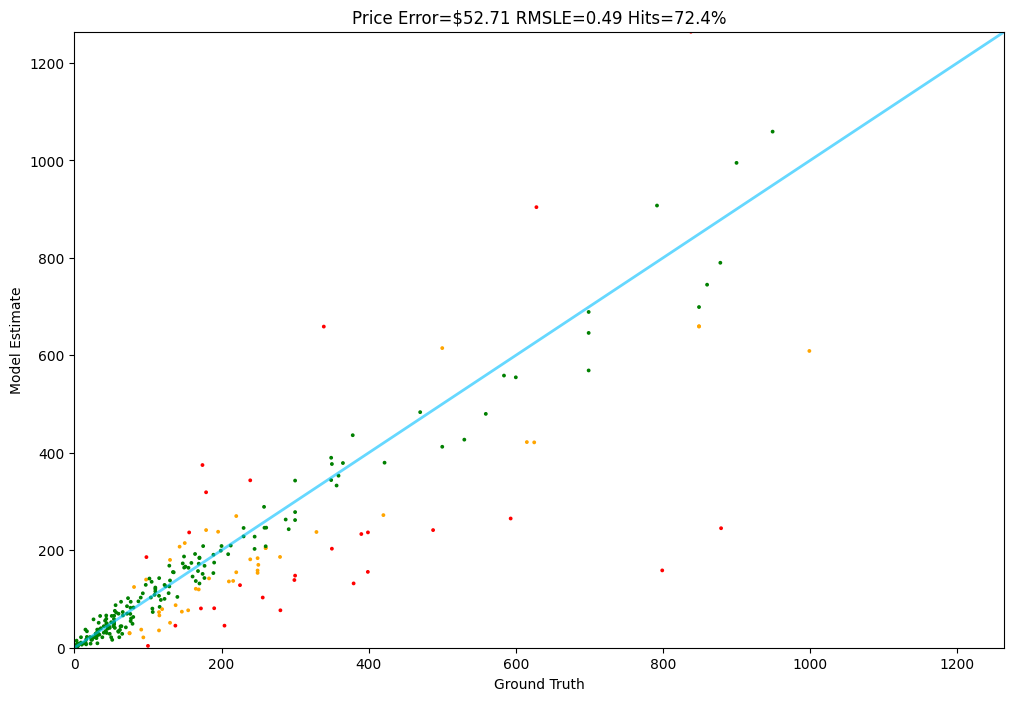

In [9]:
Tester.test(ensemble_agent.price, test[:250])

In [10]:
type(test[0].prompt)

str

In [11]:
test[0].prompt

'How much does this cost to the nearest dollar?\n\nMain_Category: Toys & Games\n\nMedicom Batman Hush Black Suit Version Batman Real Hero Action Figure\nFrom the Manufacturer From MEDICOM Toy! Based on the best-selling series Batman  Hush by Jeph Loeb and Jim Lee, Medicom unveils two more releases in their DC Comics Real Action Hero line of figures. Superman and Batman (Black Suit) are both sculpted from original designs by Jim Lee and are built using the finest craftsmanship and costume tailoring. If you can find a nicer looking Batman or Superman, buy him! From Medicom Toys Based on the best-selling DC Comics miniseries Batman  Hush by Jeph Loeb and Jim Lee 1 figure Sculpted from original designs by Jim Lee Built using the finest craftmanship and costume tailoring  "Product Dimensions"  "12 x \n\nPrice is $250.00'